In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
Result=pd.DataFrame()
path = 'Attrition_EDA.csv'
data = pd.read_csv(path)

### Check data types of each feature

In [42]:
data.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
dtype: object

In [43]:
dummies_data = pd.get_dummies(data ,columns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']
                    ,drop_first=True)

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [45]:
y=dummies_data[['Attrition']]

In [46]:
X=dummies_data.drop(['Attrition'],axis=1)

In [47]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [48]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [49]:
feature_sel_model.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True])

In [50]:
selected_features=X_train.columns[(feature_sel_model.get_support())]

In [51]:
selected_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'EducationField_Medical', 'EducationField_Technical Degree',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [10]:
'''
con_list=list()
con_list=data.columns
for i in range(len(con_list)):
    if data[con_list[i]].dtype=='object' :
        data[con_list[i]] = data[con_list[i]].astype('category')
    else:
        i=i+1
print("Data Types of all the columns:\n",data.dtypes,"\n")
'''


Data Types of all the columns:
 Attrition                      int64
Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
dtype: object 



This function drops all unnecessary features 

In [52]:
def drop_unnecessary_features(dummies_data):
    for feature in dummies_data.columns:
        if feature in selected_features:
            pass
        else:
            dummies_data=dummies_data.drop(feature,axis=1)
    return dummies_data



In [53]:
X=drop_unnecessary_features(dummies_data)

In [54]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'EducationField_Medical', 'EducationField_Technical Degree',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

We separate the dependent feature from the data set 
X=Independent features
y=Dependent feature(target)

In [35]:
'''X = final_features.drop('Attrition',axis=1).values
y = final_features['Attrition']

print(X.shape)
print(y.shape)'''

KeyError: "['Attrition'] not found in axis"

In [55]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
print(X)

[[ 0.4463504   0.74252653 -1.01090934 ... -0.24462499  1.45864991
   1.59174553]
 [ 1.32236521 -1.2977746  -0.14714972 ... -0.24462499 -0.68556546
  -0.62824112]
 [ 0.008343    1.41436324 -0.88751511 ... -0.24462499  1.45864991
   1.59174553]
 ...
 [-1.08667552 -1.60518328 -0.64072665 ... -0.24462499 -0.68556546
   1.59174553]
 [ 1.32236521  0.54667746 -0.88751511 ... -0.24462499 -0.68556546
  -0.62824112]
 [-0.32016256 -0.43256792 -0.14714972 ... -0.24462499 -0.68556546
  -0.62824112]]


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 22)
(441, 22)
(1029, 1)
(441, 1)


In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [59]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
fold = KFold(n_splits=10, shuffle=True, random_state=10)

In [61]:
accuracies = cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=fold)
print(accuracies)

print(np.mean(accuracies))

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[0.91262136 0.85436893 0.89320388 0.86407767 0.82524272 0.9223301
 0.88349515 0.81553398 0.86407767 0.88235294]
0.8717304397487151


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver 

In [ ]:
[0.82954545 0.875      0.81818182 0.90909091 0.93103448 0.86206897
 0.86206897 0.86206897 0.85057471 0.88505747]
0.8684691745036573

After applying lasso regression the accuracy has been increased

[0.91262136 0.85436893 0.89320388 0.86407767 0.82524272 0.9223301
 0.88349515 0.81553398 0.86407767 0.88235294]
0.8717304397487151

In [ ]:
[0.87378641 0.85436893 0.86407767 0.83495146 0.84466019 0.95145631
 0.89320388 0.84466019 0.9223301  0.89215686]
0.8775652008376167

[0.87378641 0.85436893 0.86407767 0.83495146 0.84466019 0.95145631
 0.89320388 0.84466019 0.9223301  0.89215686]
0.8775652008376167

In [62]:
y_train_pred = logreg.predict(X_train)
y_train_pred.shape

print(accuracy_score(y_train, y_train_pred, normalize=True, sample_weight=None))

print(classification_report(y_train, y_train_pred))

print(confusion_matrix(y_train, y_train_pred))

0.8901846452866861
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       862
           1       0.83      0.41      0.55       167

   micro avg       0.89      0.89      0.89      1029
   macro avg       0.86      0.70      0.74      1029
weighted avg       0.88      0.89      0.87      1029

[[848  14]
 [ 99  68]]


In [63]:
y_test_pred = logreg.predict(X_test)
y_test_pred.shape

print(accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))

print(classification_report(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred))

0.8843537414965986
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441

[[360  11]
 [ 40  30]]


# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
knn=KNeighborsClassifier(n_neighbors=4)

In [65]:
knn.fit(X_train,y_train)

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [66]:
y_test_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_test_pred))
print("Test accuracy: \n",knn.score(X_test,y_test))

0.8458049886621315
Test accuracy: 
 0.8458049886621315


before applying lasso regression
0.8213333333333334
Test accuracy: 
 0.8213333333333334

after applying lasso regression

0.8458049886621315
Test accuracy: 
 0.8458049886621315

In [67]:
y_train_pred=knn.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_pred))
print("Train accuracy :\n",knn.score(X_train,y_train))

0.8561710398445093
Train accuracy :
 0.8561710398445093


before applying lasso regression

0.8535469107551488
Train accuracy :
 0.8535469107551488

after applying lasso regression

0.8561710398445093
Train accuracy :
 0.8561710398445093

In [68]:
#perform k-fold cross validation with n_splits=6

folds = KFold(n_splits=6,shuffle=True,random_state=10)

scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=folds)

print(scores)

[0.86627907 0.8372093  0.79651163 0.86549708 0.81871345 0.86549708]


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\li

before applying lasso regression

[0.84246575 0.84246575 0.80821918 0.85616438 0.82758621 0.80689655]

after applying lasso regression

[0.86627907 0.8372093  0.79651163 0.86549708 0.81871345 0.86549708]


In [69]:
neighbors = np.arange(1, 9)

#empty arrays to hold train & test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\User

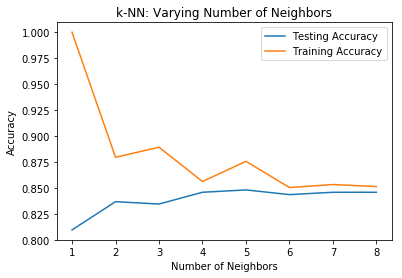

In [70]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) 
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Before applying Lasso regression

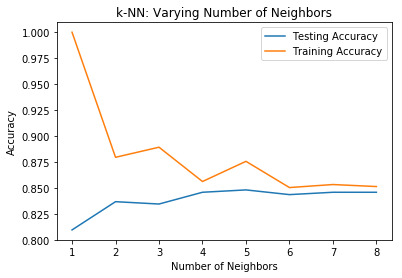

After applying Lasso regression

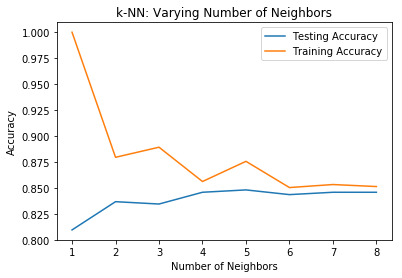

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
training_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

folds = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=folds)


print(training_score)
print(np.mean(scores))
print(test_score)

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.8756073858114675
0.8454984608098508
0.8480725623582767


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lenovo\AppData\Local\Continuum\anaconda3\li

Before applying Lasso regression
0.8649885583524027
0.8306469622331691
0.8213333333333334

After applying Lasso regression

0.8756073858114675
0.8454984608098508
0.8480725623582767

# Naive Bayes

In [38]:
#now since the  features are contineos, lets create a GaussianNB Naive Bayes models

#Write the code to import  GaussianNB from sklearn.naive_bayes

from sklearn.naive_bayes import GaussianNB

#Write the code to create NaiveBayes model object using GaussianNB class, same it name 'gnb'
gnb = GaussianNB()

#Write the code to train Naive Bayes model using fit method on X_train & Y_train

gnb.fit(X_train,y_train)

#Write the code to make Predictions on X_test using predict method
y_pred = gnb.predict(X_test)


#Execute below code to calculate different scores

from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1_score : ",metrics.f1_score(y_test,y_pred))

#Write the code to print classification_report

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


Accuracy :  0.768
Precision :  0.35135135135135137
Recall :  0.4
f1_score :  0.3741007194244604
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       310
           1       0.35      0.40      0.37        65

   micro avg       0.77      0.77      0.77       375
   macro avg       0.61      0.62      0.62       375
weighted avg       0.78      0.77      0.77       375



In [24]:
#Now, lets try to create a BernoulliNB Naive Bayes model 

#write the code to import BernoulliNB class from sklearn.naive_bayes

from sklearn.naive_bayes import BernoulliNB

#Write the code to create NaiveBayes model object using BernoulliNB class, same it name 'bnb'
bnb = BernoulliNB()

#Write the code to train Bernoulli Naive Bayes model using fit method on X_train & Y_train
bnb.fit(X_train,y_train)

#Write the code to make Predictions on X_test using predict method
Y_pred_bnb = bnb.predict(X_test)


#Write the code to print Accuracy,Precision,Recall, f1_score

from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,Y_pred_bnb))
print("Precision : ",metrics.precision_score(y_test,Y_pred_bnb))
print("Recall : ",metrics.recall_score(y_test,Y_pred_bnb))
print("f1_score : ",metrics.f1_score(y_test,Y_pred_bnb))

#Write the code to print Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test,Y_pred_bnb))

Accuracy :  0.8208616780045351
Precision :  0.5342465753424658
Recall :  0.4642857142857143
f1_score :  0.4968152866242039
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       357
           1       0.53      0.46      0.50        84

   micro avg       0.82      0.82      0.82       441
   macro avg       0.71      0.68      0.69       441
weighted avg       0.81      0.82      0.82       441



In [40]:
#Lets create a Multinominal Naive Bayes model first

from sklearn.naive_bayes import MultinomialNB


# code to create NaiveBayes model object using MultinomialNB class, same it name 'mnb'
mnb = MultinomialNB()

#Write the code to train Naive Bayes model using fit method on X_train & Y_train
mnb.fit(X_train,y_train)

#Write the code to make Predictions on X_test using predict method, use variable Y_pred
Y_pred = mnb.predict(X_test)



#Execute below code to calculate different scores

from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,Y_pred))
print("Precision : ",metrics.precision_score(y_test,Y_pred))
print("Recall : ",metrics.recall_score(y_test,Y_pred))
print("f1_score : ",metrics.f1_score(y_test,Y_pred))

ValueError: Input X must be non-negative

# Trees

# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# settings for decision tree
# max_depth: The max depth of the tree
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_leaf_nodes: Grow trees upto ``max_leaf_nodes``
# max_depth = 3, min_samples_leaf = 8, max_leaf_nodes =  10

tree_mod1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf =4,
                                   max_leaf_nodes =  4).fit(X_train, y_train)


print('Accuracy of Decision Tree Classifier on training set: {:.4f}'
        .format(tree_mod1.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'
        .format(tree_mod1.score(X_test, y_test)))


Accuracy of Decision Tree Classifier on training set: 0.8494
Accuracy of Decision Tree Classifier on test set: 0.8322


Accuracy of Decision Tree Classifier on training set: 0.8364
Accuracy of Decision Tree Classifier on test set: 0.7947

    
  Accuracy of Decision Tree Classifier on training set: 0.8494
Accuracy of Decision Tree Classifier on test set: 0.8322
  

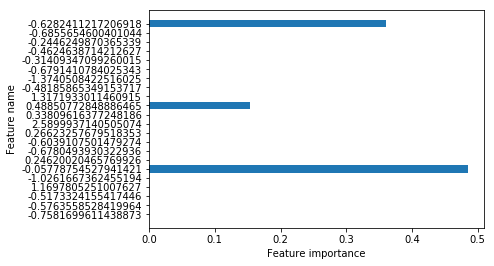

In [75]:
plt.figure()
c_features = X_train.shape[1]
feature_names = list(X_train[0])
plt.barh(range(c_features), tree_mod1.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), feature_names)
plt.show();


# Bagging

In [80]:
from sklearn.ensemble import RandomForestClassifier


In [81]:
n_features = X_train.shape[1]
bag_mod = RandomForestClassifier(bootstrap = True, n_estimators = 50,
                                random_state = 0,
                                max_features = None, min_samples_leaf = 5,
                                max_depth = 4, oob_score = True).fit(X_train, y_train)
                                
                                
print('Accuracy of Bagging classifier on training set: {:.4f}'
        .format(bag_mod.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.4f}'
        .format(bag_mod.score(X_test, y_test)))
print('Accuracy of OOB classifier on test set: {:.4f}'
        .format(bag_mod.oob_score_))

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of Bagging classifier on training set: 0.8853
Accuracy of Bagging classifier on test set: 0.8639
Accuracy of OOB classifier on test set: 0.8523


In [ ]:
Accuracy of Bagging classifier on training set: 0.8947
Accuracy of Bagging classifier on test set: 0.8107
Accuracy of OOB classifier on test set: 0.8341


Accuracy of Bagging classifier on training set: 0.8853
Accuracy of Bagging classifier on test set: 0.8639
Accuracy of OOB classifier on test set: 0.8523

    

In [82]:
bag_mod.predict(X_test)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

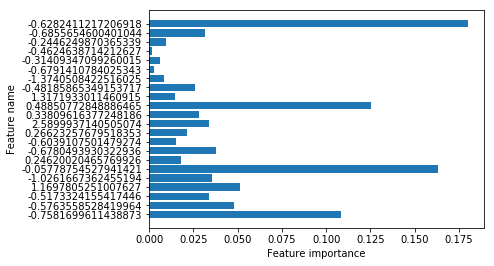

In [84]:
feature_names = list(X_train[0])
plt.figure()
plt.barh(range(n_features), bag_mod.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(n_features), feature_names)
plt.show();

# Random Forest 

In [85]:
# Random Forests
rf_mod = RandomForestClassifier(bootstrap = True, n_estimators = 50,
                                random_state = 0,
                                max_features = "auto", min_samples_leaf = 5,
                                max_depth = 4, oob_score = True).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.4f}'
        .format(rf_mod.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.4f}'
        .format(rf_mod.score(X_test, y_test)))
print('Accuracy of RF OOB classifier on test set: {:.4f}'
        .format(rf_mod.oob_score_))


Accuracy of RF classifier on training set: 0.8494
Accuracy of RF classifier on test set: 0.8503
Accuracy of RF OOB classifier on test set: 0.8426


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of RF classifier on training set: 0.8421
Accuracy of RF classifier on test set: 0.8320
Accuracy of RF OOB classifier on test set: 0.8295

    
Accuracy of RF classifier on training set: 0.8494
Accuracy of RF classifier on test set: 0.8503
Accuracy of RF OOB classifier on test set: 0.8426

# Gradient Boosted Decision Tree

In [86]:
# Gradient boosted decision trees
from sklearn.ensemble import GradientBoostingClassifier

boost_mod = GradientBoostingClassifier(n_estimators = 222, max_depth = 2,
                                      learning_rate=0.01,
                                      random_state = 0).fit(X_train, y_train)
print('Accuracy of Boosting classifier on training set: {:.4f}'
        .format(boost_mod.score(X_train, y_train)))
print('Accuracy of Boosting classifier on test set: {:.4f}'
        .format(boost_mod.score(X_test, y_test)))

# predict
boost_mod.predict(X_test)


C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Boosting classifier on training set: 0.8571
Accuracy of Boosting classifier on test set: 0.8571


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
Accuracy of Boosting classifier on training set: 0.8432
Accuracy of Boosting classifier on test set: 0.8347

    
Accuracy of Boosting classifier on training set: 0.8571
Accuracy of Boosting classifier on test set: 0.8571


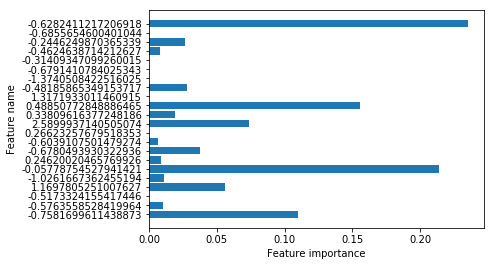

In [87]:
# plot feature importance
feature_names = list(X_train[0])
plt.figure()
plt.barh(range(n_features), boost_mod.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(n_features), feature_names)
plt.show();

In [54]:
from sklearn.svm import SVC


In [55]:
#modelling with linear SVM
model=SVC(C=1)

model=SVC(C=100,kernel='rbf')
# the code to fit the model
model.fit(X_train,y_train)

# code to predict on X_train
y_train_pred=model.predict(X_train)

#code to calculate training accuracy_score
print("Training accuracy :",accuracy_score(y_train,y_train_pred),"\n")

# code to predict on X_test
y_pred_test=model.predict(X_test)

#code to calculate test accuracy_score
print("Test Accuracy :",accuracy_score(y_test,y_pred_test),"\n")


Training accuracy : 1.0 

Test Accuracy : 0.7946666666666666 



C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
#Modelling with non-linear SVM

model2=SVC(C=100,kernel='rbf')
# Write the code to fit the model
model2.fit(X_train,y_train)


# Write the code to predict on X_test
y_pred_test=model2.predict(X_test)

y_pred_train=model2.predict(X_train)

#Write the code to calculate test accuracy_score
print("Test accuracy :",accuracy_score(y_test,y_pred_test),"\n")
print("Train accuracy :",accuracy_score(y_train,y_pred_train),"\n")

Test accuracy : 0.7946666666666666 

Train accuracy : 1.0 



C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Clustering

In [57]:
from sklearn.cluster import KMeans
print(data.head())

   Unnamed: 0 Attrition  Age     BusinessTravel  DailyRate  \
0           0         1   41      Travel_Rarely       1102   
1           1         0   49  Travel_Frequently        279   
2           2         1   37      Travel_Rarely       1373   
3           3         0   33  Travel_Frequently       1392   
4           4         0   27      Travel_Rarely        591   

               Department  DistanceFromHome EducationField  \
0                   Sales                 1  Life Sciences   
1  Research & Development                 8  Life Sciences   
2  Research & Development                 2          Other   
3  Research & Development                 3  Life Sciences   
4  Research & Development                 2        Medical   

   EnvironmentSatisfaction  JobInvolvement  ...                JobRole  \
0                        2               3  ...        Sales Executive   
1                        3               2  ...     Research Scientist   
2                        4      

In [60]:
df_new=dummies_data.drop("Attrition",axis=1)


In [61]:
inertia = []
X = df_new
for k in np.arange(1,12):
    #code here to instanciate KMeans object with n_clusters=k & random_state=10
    km = KMeans(n_clusters=k,random_state=10)
    km.fit(X)
    inertia.append(km.inertia_)

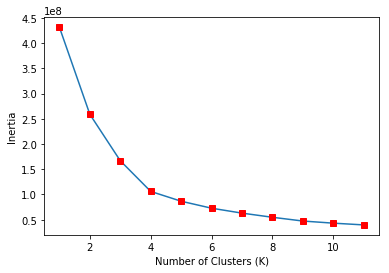

In [62]:
plt.plot(list(np.arange(1,12)),inertia)
plt.plot(list(np.arange(1,12)),inertia,'rs')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [63]:
#Instantiate KMeans with appropriate value of K random state 1- 
km1=KMeans(n_clusters=5,random_state=1)

#fit using fit method
km1.fit(X)

#assign labels using predict method on X
labels = km1.predict(X)

set(labels)

{0, 1, 2, 3, 4}

In [64]:
print(len(df_new[labels==0]))
df_new[labels==0].describe()

222


,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,228.950450,35.306306,1181.644144,9.400901,2.851351,2.788288,1.720721,2.837838,2.518018,15.418919,...,0.076577,0.027027,0.207207,0.121622,0.238739,0.247748,0.067568,0.409910,0.337838,0.292793
std,143.351078,8.840254,203.366941,8.173271,1.011461,0.676194,0.720372,1.097430,2.411725,3.697890,...,0.266519,0.162529,0.406221,0.327587,0.427276,0.432680,0.251570,0.492928,0.474042,0.456072
min,0.000000,18.000000,776.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.500000,29.000000,1005.000000,2.250000,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218.500000,34.000000,1210.500000,7.000000,3.000000,3.000000,2.000000,3.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,344.750000,40.000000,1355.750000,15.500000,4.000000,3.000000,2.000000,4.000000,4.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,546.000000,60.000000,1499.000000,29.000000,4.000000,4.000000,3.000000,4.000000,9.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
print(len(df_new[labels==1]))
df_new[labels==1].describe()

306


,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,1148.130719,34.993464,466.114379,9.970588,2.761438,2.718954,1.696078,2.656863,2.411765,14.960784,...,0.088235,0.062092,0.196078,0.098039,0.232026,0.241830,0.068627,0.460784,0.359477,0.261438
std,189.674862,8.113940,193.868106,8.278500,1.076706,0.759271,0.669561,1.132197,2.391321,3.548969,...,0.284101,0.241717,0.397679,0.297855,0.422817,0.428893,0.253234,0.499276,0.480633,0.440138
min,775.000000,18.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,992.250000,29.000000,325.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1156.000000,34.000000,475.500000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1307.250000,40.000000,607.000000,16.000000,4.000000,3.000000,2.000000,4.000000,4.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1469.000000,60.000000,830.000000,29.000000,4.000000,4.000000,3.000000,4.000000,9.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
print(len(df_new[labels==2]))
df_new[labels==2].describe()

299


,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,392.531773,35.421405,425.665552,9.023411,2.608696,2.698997,1.709030,2.702341,2.571906,15.274247,...,0.09699,0.020067,0.207358,0.113712,0.234114,0.264214,0.076923,0.434783,0.344482,0.274247
std,216.928068,8.847497,195.714459,8.182244,1.091790,0.697334,0.689533,1.109006,2.458518,3.735155,...,0.29644,0.140464,0.406094,0.317994,0.424153,0.441653,0.266916,0.496560,0.475996,0.446882
min,1.000000,18.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198.000000,30.000000,250.500000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,399.000000,34.000000,442.000000,7.000000,3.000000,3.000000,2.000000,3.000000,1.000000,14.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,570.500000,40.500000,593.500000,13.000000,4.000000,3.000000,2.000000,4.000000,4.000000,18.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,781.000000,59.000000,798.000000,29.000000,4.000000,4.000000,3.000000,4.000000,9.000000,25.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
print(len(df_new[labels==3]))
df_new[labels==3].describe()

194


,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1225.067010,36.164948,1200.644330,8.979381,2.716495,2.747423,1.762887,2.695876,2.850515,15.360825,...,0.118557,0.056701,0.190722,0.087629,0.211340,0.278351,0.056701,0.494845,0.278351,0.273196
std,145.997483,7.740855,187.008554,7.849596,1.141327,0.714845,0.716543,1.065368,2.525174,3.592409,...,0.324103,0.231869,0.393887,0.283486,0.409315,0.449347,0.231869,0.501267,0.449347,0.446754
min,886.000000,18.000000,833.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1102.750000,31.000000,1060.250000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1233.500000,35.000000,1206.000000,7.000000,3.000000,3.000000,2.000000,3.000000,2.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1360.250000,40.000000,1353.250000,13.000000,4.000000,3.000000,2.000000,4.000000,4.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1468.000000,59.000000,1498.000000,29.000000,4.000000,4.000000,3.000000,4.000000,9.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
print(len(df_new[labels==4]))
df_new[labels==4].describe()

228


,Unnamed: 0,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,733.491228,34.942982,1053.789474,8.697368,2.741228,2.688596,1.635965,2.798246,2.565789,15.188596,...,0.092105,0.043860,0.236842,0.114035,0.250000,0.210526,0.057018,0.438596,0.320175,0.307018
std,141.832391,8.662609,202.803174,7.640640,1.114052,0.717590,0.698599,1.112047,2.558576,3.546352,...,0.289811,0.205233,0.426080,0.318553,0.433965,0.408579,0.232386,0.497307,0.467570,0.462272
min,450.000000,18.000000,654.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,618.500000,28.000000,886.500000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,741.000000,34.000000,1014.500000,7.000000,3.000000,3.000000,2.000000,3.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,845.250000,40.000000,1208.250000,11.250000,4.000000,3.000000,2.000000,4.000000,4.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1045.000000,60.000000,1492.000000,29.000000,4.000000,4.000000,3.000000,4.000000,9.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Hierarchical Clustering

In [69]:
from scipy.cluster.hierarchy import linkage

In [70]:
link=linkage(df_new,method='single')

print(link.shape)

(1248, 4)


In [71]:
from scipy.cluster.hierarchy import dendrogram

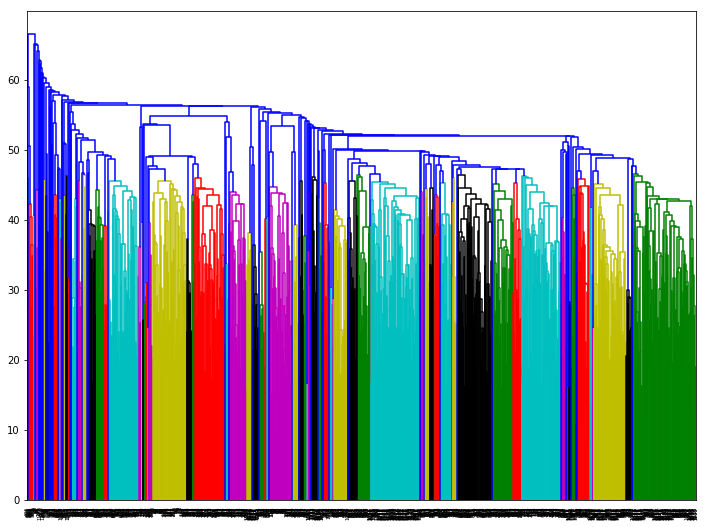

In [72]:
plt.figure(figsize=(12, 9))  
#labelList = range(1, 5)
_ = dendrogram(link,  
           orientation='top')

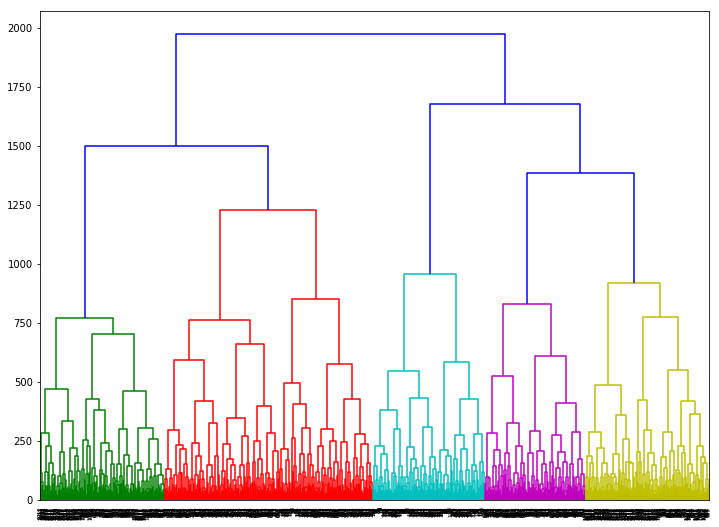

In [73]:
link=linkage(df_new,method='complete')
plt.figure(figsize=(12, 9))  
#labelList = range(1, 5)
_ = dendrogram(link,  
           orientation='top')